## Gradient Descent in Linear Regression

1) **Initialize Parameters:** slome m and intercept b
2) **Calculate the cost function:** measure the error using the MSE
3) **Compute the Gradient:** for slope m and intercept b
4) **Update Parameters:** change m and b to reduce the error
5) **Repeat:** keep repeating steps 2-4 until the error stops decreasing significantly

---
**X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42):** Generating 100 data points with one input feature and some noise for realism

**X_b = np.c_[np.ones((m, 1)), X]:** Adding a column of ones to X to account for the intercept term in the model.

**theta = np.array([[2.0], [3.0]]):** Initializing model parameters(intercept and slope) with starting values

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_regression

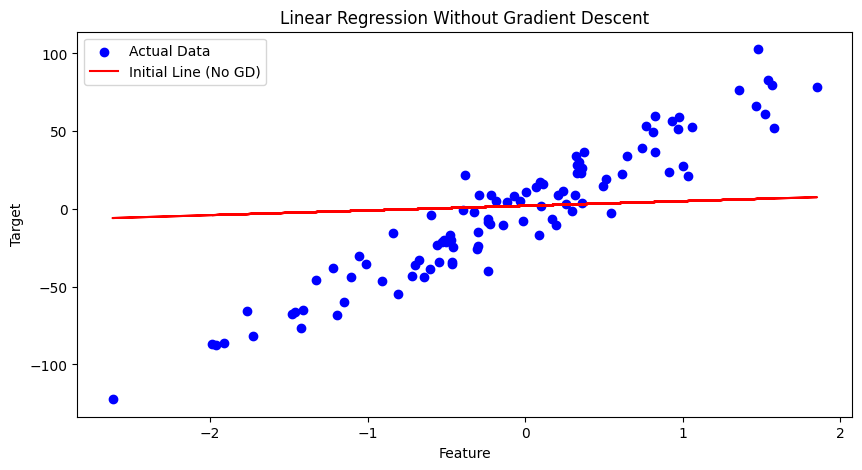

In [65]:
X, y = make_regression(n_samples=100, n_features=1, noise=15, random_state=42)
y = y.reshape(-1, 1)
m = X.shape[0]

X_b = np.c_[np.ones((m, 1)), X]

theta = np.array([[2.0], [3.0]])

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color="blue", label="Actual Data")
plt.plot(X, X_b.dot(theta), color="red", label="Initial Line (No GD)")
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Linear Regression Without Gradient Descent")
plt.legend()
plt.show()

Here the model’s predictions are not accurate and the line does not fit the data well. This happens because the initial parameters are not optimized which prevents the model from finding the best-fit line.

Now we will apply **gradient descent** to improve the model and optimize these parameters.

**learning_rate = 0.1, n_iterations = 100:** Set the learning rate and number of iterations for gradient descent to run respectively.

**gradients = (2 / m) * X_b.T.dot(y_pred - y):** Finding gradients of the cost function with respect to parameters.

**theta -= learning_rate * gradients:** Updating parameters by moving opposite to the gradient direction.

---

If you have 1 feature → model has 2 parameters (θ0 = intercept, θ1 = slope). Cost depends on those two → so you can plot cost in 3D.

If you have more than 1 feature → more than 2 parameters → can’t draw in 3D (too many dimensions). You only see 2D contour plots for 2 parameters.

---

### 3D Gradient Descent - Visualization Before Application

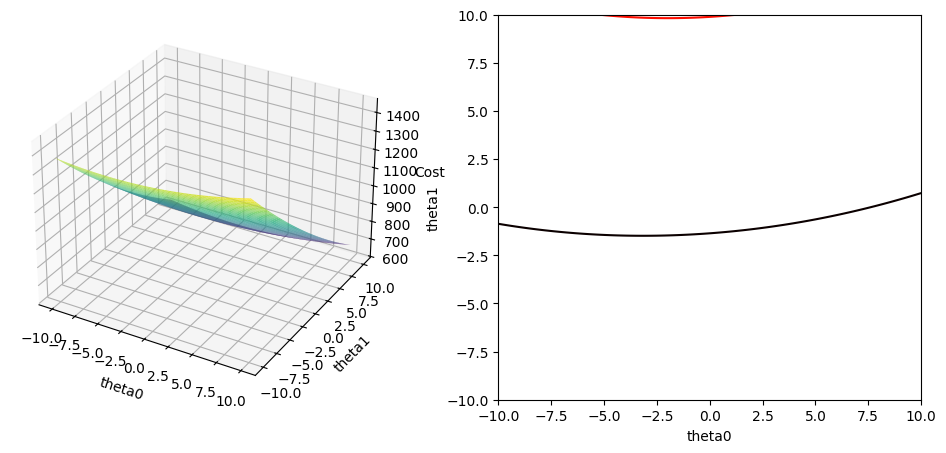

In [43]:
from mpl_toolkits.mplot3d import Axes3D

# Cost function
def compute_cost(X, y, theta):
    m = len(y)
    return (1/(2*m)) * np.sum((X.dot(theta) - y) ** 2)

# Grid for theta0 and theta1
theta0_vals = np.linspace(-10, 10, 100)
theta1_vals = np.linspace(-10, 10, 100)
J_vals = np.zeros((len(theta0_vals), len(theta1_vals)))

for i, t0 in enumerate(theta0_vals):
    for j, t1 in enumerate(theta1_vals):
        t = np.array([[t0], [t1]])
        J_vals[i, j] = compute_cost(X_b, y, t)

# 3D surface
T0, T1 = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=(12, 5))

ax = fig.add_subplot(121, projection="3d")
ax.plot_surface(T0, T1, J_vals.T, cmap="viridis", alpha=0.8)
ax.set_xlabel("theta0")
ax.set_ylabel("theta1")
ax.set_zlabel("Cost")

# Contour plot (2D view)
ax2 = fig.add_subplot(122)
CS = ax2.contour(T0, T1, J_vals.T, levels=np.logspace(-1, 3, 20), cmap="hot_r")
ax2.set_xlabel("theta0")
ax2.set_ylabel("theta1")
plt.show()

In [53]:
### above is just for intuition

### Gradient Descent applied in Linear Regression model

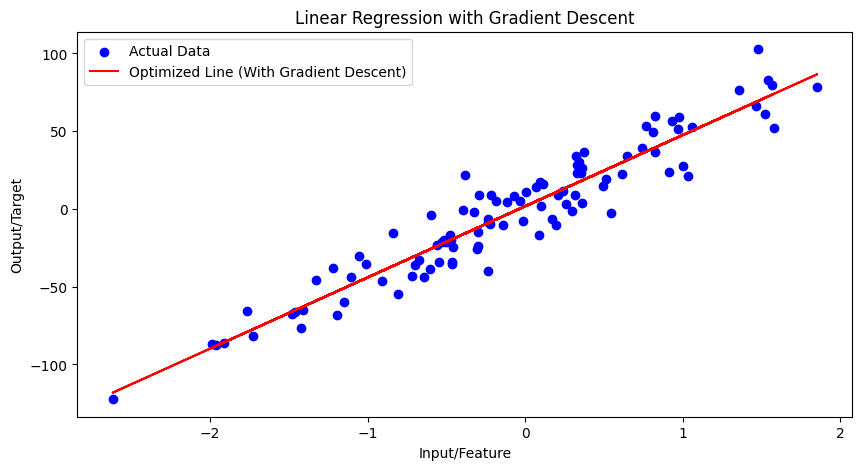

In [67]:
learning_rate = 0.1
n_iterations = 100

for i in range(n_iterations):
    y_pred = X_b.dot(theta)
    gradients = (2/m) * X_b.T.dot(y_pred - y)
    theta -= learning_rate * gradients
    

plt.figure(figsize=(10, 5))
plt.scatter(X, y, color = 'blue', label='Actual Data')
plt.plot(X, X_b.dot(theta), color='red', label='Optimized Line (With Gradient Descent)')
plt.xlabel('Input/Feature')
plt.ylabel('Output/Target')
plt.title('Linear Regression with Gradient Descent')
plt.legend()
plt.show()

---
Linear Regression with Gradient Descent shows how the model gradually learns to fit the line that minimizes the difference between predicted and actual values by updating parameters step by step.

---

In [74]:
'''
You reset theta so the gradient descent path starts from your original initial line
(theta = [[2], [3]]) instead of continuing from the already-updated theta in the 
3rd cell. This ensures the path on the 3D/contour plot matches the actual descent
from the starting point.
'''

'\nYou reset theta so the gradient descent path starts from your original initial line\n(theta = [[2], [3]]) instead of continuing from the already-updated theta in the \n3rd cell. This ensures the path on the 3D/contour plot matches the actual descent\nfrom the starting point.\n'

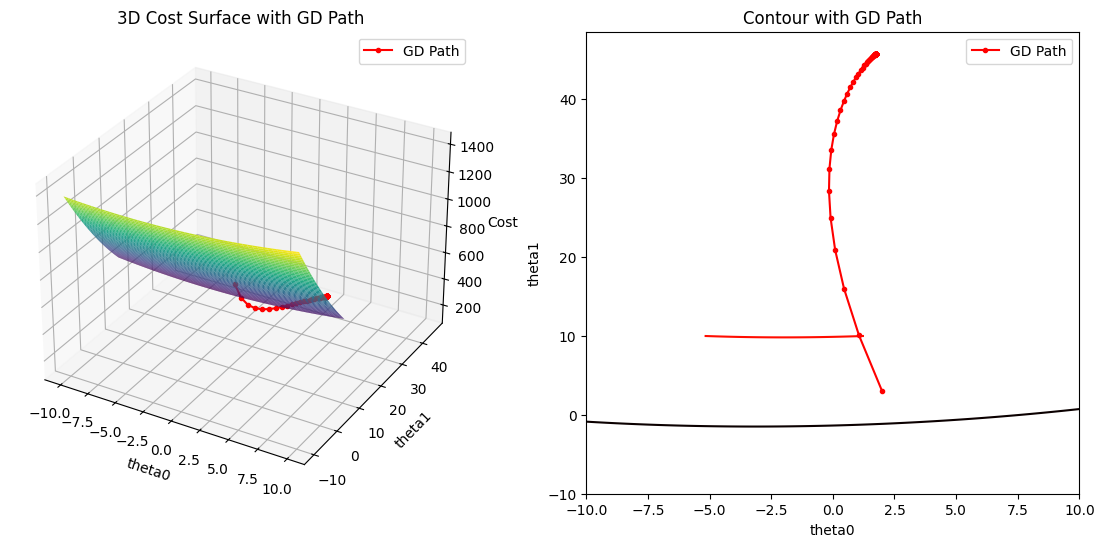

In [78]:
# Store theta history during GD (you need to modify your 3rd cell slightly)
theta = np.array([[2.0], [3.0]])  # reset initial theta
theta_history = [theta.copy()]

learning_rate = 0.1
n_iterations = 100
for i in range(n_iterations):
    y_pred = X_b.dot(theta)
    gradients = (2/m) * X_b.T.dot(y_pred - y)
    theta -= learning_rate * gradients
    theta_history.append(theta.copy())

theta_history = np.array(theta_history).squeeze()

# 3D surface and contour path
fig = plt.figure(figsize=(14, 6))

# 3D surface
ax = fig.add_subplot(121, projection='3d')
ax.plot_surface(T0, T1, J_vals.T, cmap='viridis', alpha=1.0)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost')
ax.set_title('3D Cost Surface with GD Path')

# GD path on 3D surface
ax.plot(theta_history[:,0], theta_history[:,1],
        [compute_cost(X_b, y, th.reshape(2,1)) for th in theta_history],
        'r-o', markersize=3, label='GD Path')
ax.legend()

# 2D contour plot
ax2 = fig.add_subplot(122)
CS = ax2.contour(T0, T1, J_vals.T, levels=np.logspace(-1, 3, 20), cmap='hot_r')
ax2.set_xlabel('theta0')
ax2.set_ylabel('theta1')
ax2.set_title('Contour with GD Path')

# GD path on contour
ax2.plot(theta_history[:,0], theta_history[:,1], 'r-o', markersize=3, label='GD Path')
ax2.legend()

plt.show()

# Gradient Descent 2

In [94]:
import scienceplots
from IPython.display import display, Latex, Image
from celluloid import Camera

np.random.seed(0)
plt.style.use(['science', 'no-latex'])

- **`scienceplots`**  
  A matplotlib style library that makes plots look like scientific papers.  
  **Advantage**: cleaner, more professional visuals for reports and presentations.

- **`display`**  
  From IPython, used to show rich outputs (text, images, LaTeX, etc.) in Jupyter Notebook.

- **`Latex`**  
  Renders math or text written in LaTeX format inside Jupyter.  
  **Advantage**: equations and symbols look neat and professional.

- **`Image`**  
  Displays image files (e.g., PNG, JPG) directly inside Jupyter cells.

- **`Camera`** (from `celluloid`)  
  Records matplotlib plots frame by frame to create animations.  
  **Use case**: visualize processes like gradient descent step by step.

In [256]:
# X, y = make_regression(n_samples=200, n_features=1, noise=100, random_state=20)
# y = y.reshape(-1, 1)
# m = X.shape[0] # slope m

# b = np.c_[np.ones((m, 1)), X] # intercept b

# theta = np.array([[2.0], [3.0]])

In [324]:
# generate data
X, y = make_regression(n_samples=200, n_features=1, noise=100, random_state=20)
y = y.reshape(-1, 1)
m = X.shape[0]

# design matrix for linear regression
X_b = np.c_[np.ones((m, 1)), X]  

theta = np.array([[2.0], [3.0]])

# optional: scale X to 0-50 if you want “Room Size” in that range
X = 50 * (X - X.min()) / (X.max() - X.min())
X_b = np.c_[np.ones((m, 1)), X]

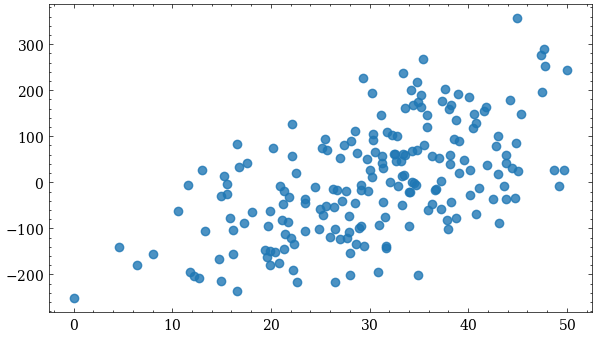

In [326]:
fig = plt.figure(figsize=(7, 4))
ax = fig.add_subplot()
ax.scatter(X, y, color='#1f77b4', marker='o', alpha=0.8)
plt.show()

### Loss Function: Mean Squared Error

In [314]:
# Loss Function Gradient: 
def mse_loss(x, y, m, b):
    return np.mean(np.square(y - (m * x + b)))

In [185]:
# Loss Function in Terms of m (slope)
def mse_loss_dm(x, y, m, b):
    return -2 * np.mean(x * (y - (m * x + b)))

In [187]:
# Loss Function in Terms of b
def mse_loss_db(x, y, m, b):
    return -2 * np.mean(y - (m * x + b))

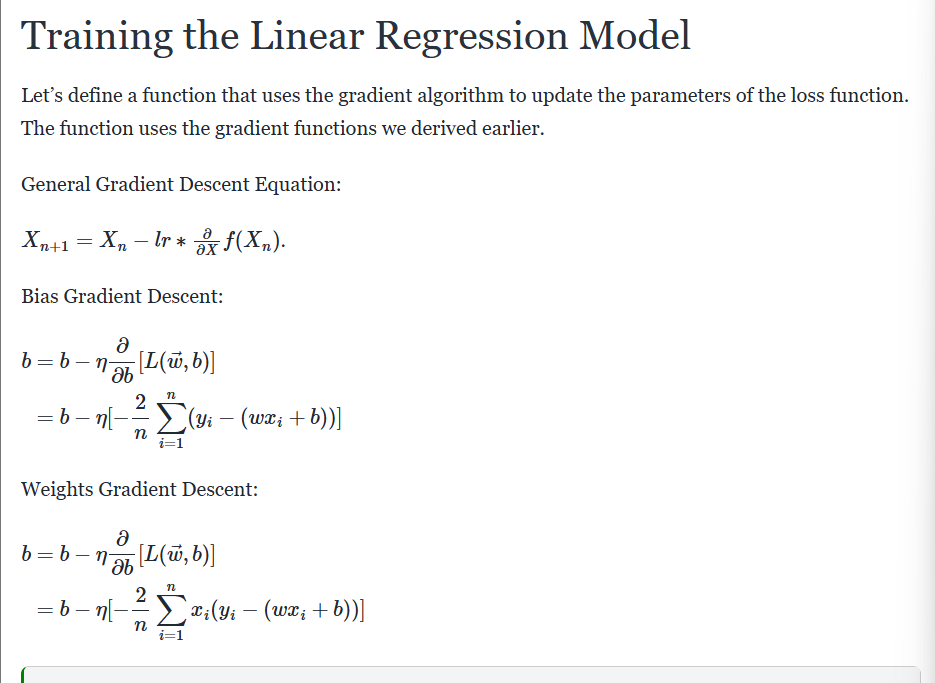

In [192]:
# Training the Linear Regression Model
def update_m_and_b(x, y, m, b, learning_rate):
    # update m and b
    m = m - mse_loss_dm(x, y, m, b) * learning_rate
    b = b - mse_loss_db(x, y, m, b) * learning_rate
    return m, b

### Graphing functions

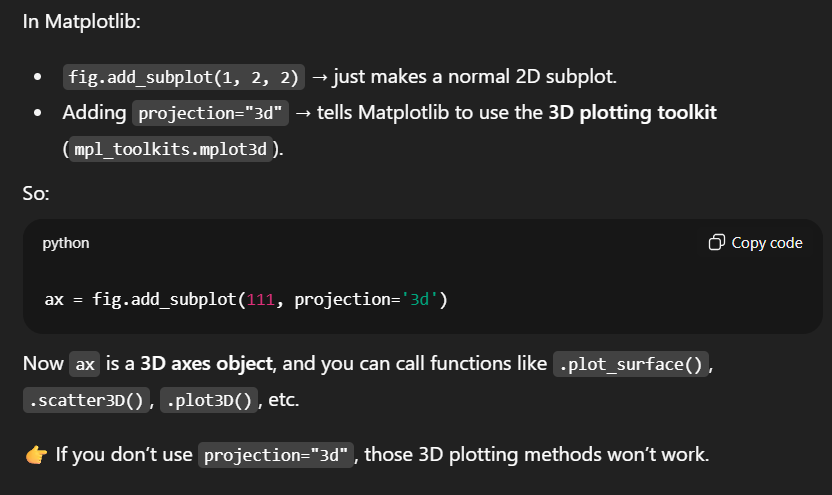

In [316]:
def create_plots():
    plt.ioff() # interactive mode off in matplotlib
    fig = plt.figure(figsize = (16/9.0 * 4, 4 * 1), layout = 'constrained')
    fig.suptitle('Gradient Descent')
    ax0 = fig.add_subplot(1, 2, 1)
    ax0.set_xlabel('Room Size', fontweight = 'normal')
    ax0.set_ylabel('Price', fontweight = 'normal')
    ax0.set_title('Linear Regression')

    ax1 = fig.add_subplot(1, 2, 2, projection = '3d') # read above chatgpt result, 3D
    ax1.set_xlabel('Slope, m')
    ax1.set_ylabel('Intercept, b')
    ax1.set_zlabel('Error')
    ax1.set_title('Error')
    ax1.view_init(15, -35)

    camera = Camera(fig)
    return ax0, ax1, camera

def generate_error_range(x, y, N, m_max, b_max):
    m_range = np.arange(0, m_max, m_max / N)
    b_range = np.arange(0, b_max, b_max / N)
    m_range, b_range = np.meshgrid(m_range, b_range)
    m_range = m_range.flatten()
    b_range = b_range.flatten()

    error_range = np.array([])
    for i in range(min(m_range.shape[0], b_range.shape[0])):
        error_range = np.append(error_range, mse_loss(x, y, m_range[i], b_range[i]))
    return m_range, b_range, error_range

### Training the model
The train function will update the parameters in each epoch and update the visualization.

In [328]:
# Training the model
#The train function will update the parameters in each epoch and update the visualization.
# w is m which is slope m, in this function slope w, hence assigned w = m0
def train(x, y, m0, b0, learning_rate, epochs, output_filename):
    w = m0
    b = b0

    ax0, ax1, camera = create_plots()
    loss_dims = 20
    w_max = 0.5
    b_max = 15
    w_range, b_range, error_range = generate_error_range(x, y, loss_dims, w_max, b_max)

    # ax0.scatter(x, y, color="#1f77b4", marker="o", alpha=0.25)
    
    for e in range(epochs):
        w, b = update_m_and_b(x, y, w, b, learning_rate)
        if (
            (e == 0)
            or (e < 60 and e % 5 == 0)
            or (e < 3000 and e % 1000 == 0)
            or (e % 3000 == 0)
        ):
            # Plot the error given the current slope and y-intercept
            ax1.scatter(w_range, b_range, error_range, color="blue", alpha=0.05)
            ax1.scatter([w], [b], [mse_loss(x, y, w, b)], color="red", s=100)

            # Plot the linear regression lines
            ax0.scatter(x, y, color="#1f77b4", marker="o", alpha=0.25)
            X_plot = np.linspace(0, 50, 50)
            ax0.plot(X_plot, X_plot * w + b, color="black")

            # print the loss
            print("epoch: ", str(e), "loss: " + str(mse_loss(x, y, w, b)))
            camera.snap()

    animation = camera.animate()
    animation.save(output_filename, writer="pillow")
    plt.show()

    return w, b

epoch:  0 loss: 14212.428430347512
epoch:  5 loss: 13892.408505558484
epoch:  10 loss: 13782.722038284512
epoch:  15 loss: 13744.95648500078
epoch:  20 loss: 13731.784252647636
epoch:  25 loss: 13727.022202218755
epoch:  30 loss: 13725.1364867331
epoch:  35 loss: 13724.234680026526
epoch:  40 loss: 13723.669553631917
epoch:  45 loss: 13723.219708177718
epoch:  50 loss: 13722.809385050377
epoch:  55 loss: 13722.41264715532


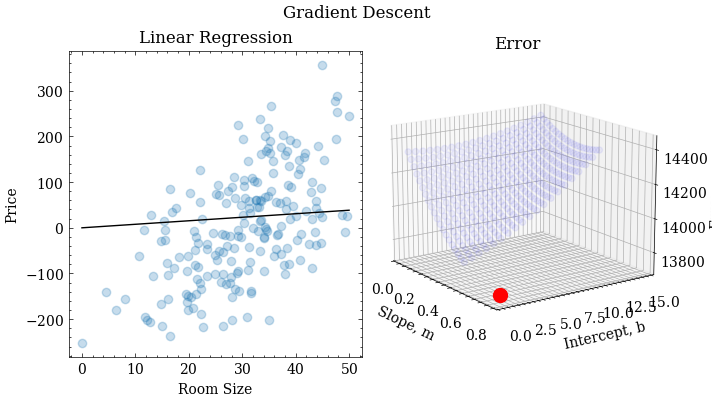

(0.7746595216751192, -0.1767062630738177)

In [330]:
output_filename = 'gradient-descent.gif'
train(X, y, 0.0, 0, 0.00005, 100, output_filename)

In [331]:
(np.float64(0.4560414772297029), np.float64(1.0259430403235812))

(0.4560414772297029, 1.0259430403235812)

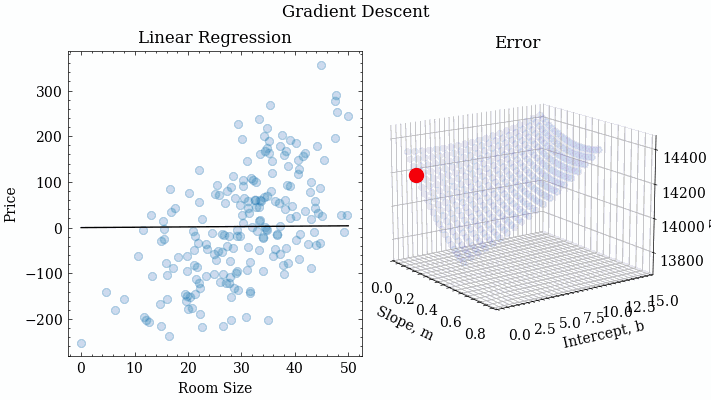

In [334]:
Image(filename=output_filename)